In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot

In [2]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [3]:
data = pd.read_hdf('Data.h5')

669
[46.12509155 46.12717438 46.11248398 46.11226273 46.1006813  46.04619598
 46.03800201 45.99877548 45.93959045 45.87380219 45.80300903 45.71224976
 45.66597748 45.57789993 45.51131058 45.42160416 45.31479263 45.18509674
 45.09537125 44.9928894  44.86047745 44.7475853  44.66810608 44.50605774
 44.49139404 44.61306763 44.72903824 44.80429077 44.90672684 44.97200012
 45.04338837 45.08932114 45.14838409 45.21945953 45.28399658 45.30973434
 45.3301506  45.35691833 45.38334274 45.42302704 45.45797348 45.43418503
 45.42699814 45.45049667 45.41042328 45.37963104 45.36326218 45.32413101
 45.2768898  45.23195648 45.17901611 45.10303497 45.04809189 44.97719193
 44.87339783 44.77661133 44.68396378 44.59523773 44.48592758 44.46099472
 44.59605026 44.68249512 44.7328186  44.79104614 44.86344528 44.89891434
 44.92704391 44.97003174 44.96669769 44.98796082 45.01031494 45.03673172
 45.08918381 45.05836105 45.07554626 45.04693222 45.02259445 45.01746368
 44.95997238 44.93263245 44.86360168 44.8145103

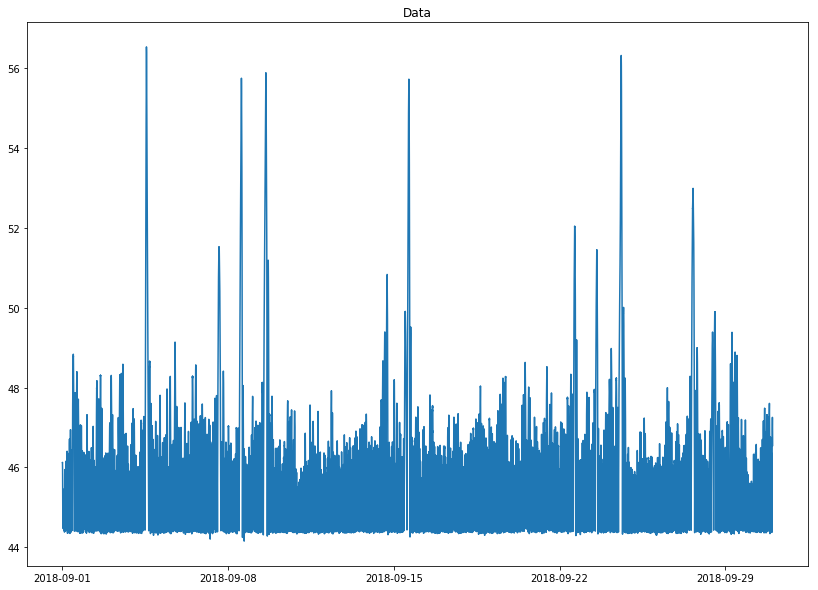

In [155]:
prev_steps = 100
i = np.random.randint(data.shape[1])
# i = 708
# i=202
i=669
print(i)
plt.figure(figsize=(14,10))
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

X = []
y = []
for start in range(len(data.iloc[:,i][:-prev_steps])):
    tmp = data.iloc[:,i][start:start+prev_steps]
    X.append(tmp)
    y.append(data.iloc[:,i][start+prev_steps])
X = np.array(X)
y = np.array(y)
print(X[0])
print(y[0])

In [156]:
np.save('X', X)

In [157]:
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(prev_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [158]:
X = X.reshape(X.shape[0], X.shape[1], 1)
model.fit(X,y,epochs=40,batch_size=50)

Epoch 1/40
43100/43100 [==============================] - 20s 457us/step - loss: 7692860507.9970
Epoch 2/40
43100/43100 [==============================] - 20s 454us/step - loss: 1529.5750
Epoch 3/40
43100/43100 [==============================] - 20s 453us/step - loss: 1766.9210
Epoch 4/40
43100/43100 [==============================] - 20s 453us/step - loss: 1147294075.2510
Epoch 5/40
43100/43100 [==============================] - 20s 456us/step - loss: 50939.1737
Epoch 6/40
43100/43100 [==============================] - 20s 453us/step - loss: 1966.2788
Epoch 7/40
43100/43100 [==============================] - 20s 454us/step - loss: 1965.6820
Epoch 8/40
43100/43100 [==============================] - 20s 454us/step - loss: 1964.8132
Epoch 9/40
43100/43100 [==============================] - 20s 454us/step - loss: 1963.6017
Epoch 10/40
43100/43100 [==============================] - 20s 454us/step - loss: 1961.6756
Epoch 11/40
43100/43100 [==============================] - 20s 454us/step - 

In [159]:
preds = model.predict(X)
# del X
# errors1 = preds[:int(len(preds)/2)].reshape(-1) - y[:int(len(preds)/2)]
# errors2 = preds[int(len(preds)/2):].reshape(-1) - y[int(len(preds)/2):]
errors = preds.reshape(-1) - y

In [164]:
anomalies = errors > errors.mean() + 4 * errors.std()

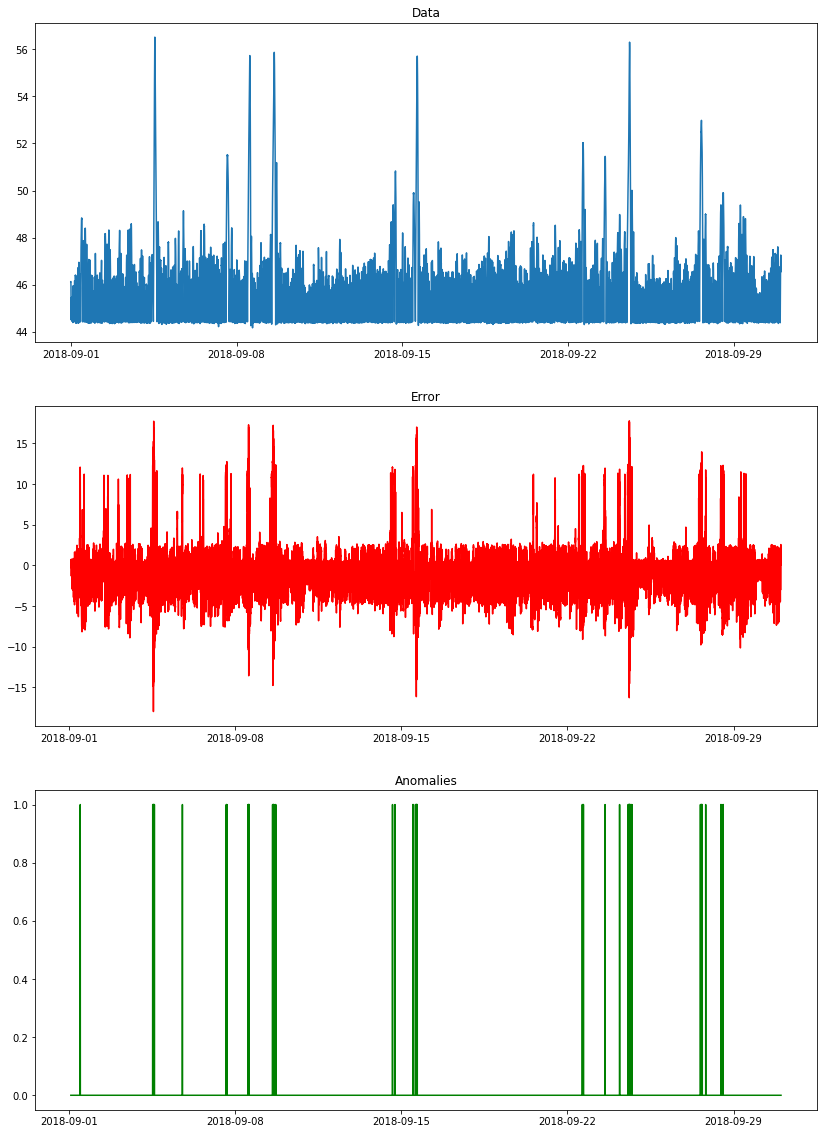

In [165]:
plt.figure(figsize=(14,20))
plt.subplot(3,1,1)
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

plt.subplot(3,1,2)
plt.title('Error')
plt.plot(data.index[prev_steps:], errors, color='red')

plt.subplot(3,1,3)
plt.title('Anomalies')
plt.plot(data.index[prev_steps:], anomalies, color='green')
